In [31]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [7]:
iris = sns.load_dataset('iris')
iris.head()

#species는 카테고리이므로 양적변수가 아닌 질적변수

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


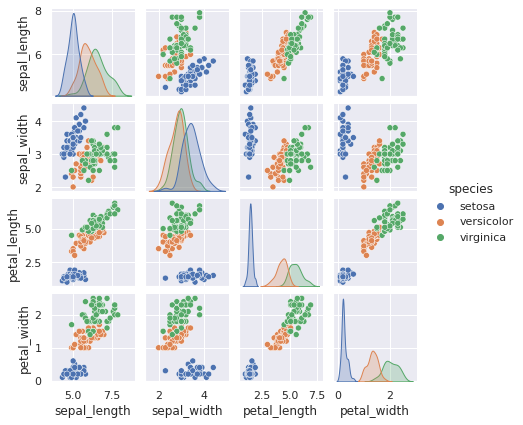

In [9]:
%matplotlib inline
## EDA
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [14]:
X = iris.iloc[:,:-1]
y = iris.iloc[:,[-1]]
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [16]:
X_iris = iris.drop('species', axis=1)
y_iris = iris[['species']]
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150, 1)


In [17]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_col = ['species']
X = iris[feature_cols]
y = iris[target_col]
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [22]:
(iris.sepal_length - min(iris.sepal_length)) / (max(iris.sepal_length) - min(iris.sepal_length))

0      0.222222
1      0.166667
2      0.111111
3      0.083333
4      0.194444
         ...   
145    0.666667
146    0.555556
147    0.611111
148    0.527778
149    0.444444
Name: sepal_length, Length: 150, dtype: float64

In [28]:
mmScaler = MinMaxScaler()
mmScaler.fit(iris[['sepal_length']])

MinMaxScaler()

In [29]:
mmScaler.transform(iris[['sepal_length']])

array([[0.22222222],
       [0.16666667],
       [0.11111111],
       [0.08333333],
       [0.19444444],
       [0.30555556],
       [0.08333333],
       [0.19444444],
       [0.02777778],
       [0.16666667],
       [0.30555556],
       [0.13888889],
       [0.13888889],
       [0.        ],
       [0.41666667],
       [0.38888889],
       [0.30555556],
       [0.22222222],
       [0.38888889],
       [0.22222222],
       [0.30555556],
       [0.22222222],
       [0.08333333],
       [0.22222222],
       [0.13888889],
       [0.19444444],
       [0.19444444],
       [0.25      ],
       [0.25      ],
       [0.11111111],
       [0.13888889],
       [0.30555556],
       [0.25      ],
       [0.33333333],
       [0.16666667],
       [0.19444444],
       [0.33333333],
       [0.16666667],
       [0.02777778],
       [0.22222222],
       [0.19444444],
       [0.05555556],
       [0.02777778],
       [0.19444444],
       [0.22222222],
       [0.13888889],
       [0.22222222],
       [0.083

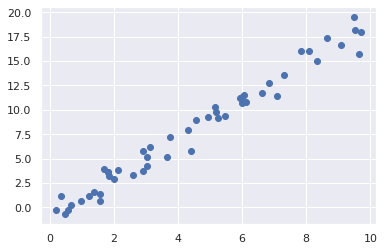

In [30]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [33]:
linear_model = LinearRegression()

In [40]:
x = x.reshape(50,1)

In [42]:
y.shape

(50,)

In [41]:
linear_model.fit(x,y)

LinearRegression()

In [46]:
linear_model.intercept_

-0.9033107255311164

In [49]:
linear_model.predict([[3]])

array([5.02965908])

In [50]:
linear_model.score(x,y)

0.9749140085676858

In [51]:
linear_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [52]:
linear_model = LinearRegression(fit_intercept=False, normalize=True)

In [53]:
linear_model.fit(x,y)

LinearRegression(fit_intercept=False, normalize=True)

In [54]:
linear_model.score(x,y)

0.9676662984133994

In [57]:
linear_model.predict(x[:5,:])

array([ 6.86951869, 17.43725002, 13.42565405, 10.98012052,  2.86157053])

In [58]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = linear_model.predict(Xfit)

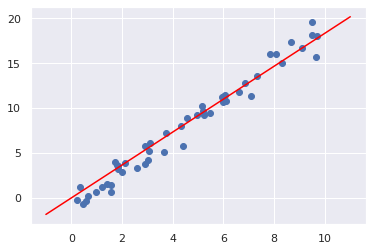

In [60]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');

In [142]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [104]:
import seaborn as sns
df = sns.load_dataset('iris')

idx = np.random.choice(150,150, replace=False)

In [105]:
tr_idx = idx[:int(len(idx)*0.8)]
te_idx = idx[int(len(idx)*0.8):]
X = df.iloc[:,:-1]
y = df.iloc[:,[-1]]
X_train = X.iloc[tr_idx,:]
X_test = X.iloc[te_idx,:]
y_train = y.iloc[tr_idx,:]
y_test = y.iloc[te_idx,:]

In [106]:
model = GaussianNB()

In [107]:
model.fit(X_train,y_train)

GaussianNB()

In [108]:
y_hat = model.predict(X_test)

In [109]:
sum(y_test .values.reshape(-1,) == y_hat)/y_test.size

0.9666666666666667

In [115]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [116]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [117]:
y_hat = model.predict(X_test)
accuracy_score(y_hat,y_test)

0.9666666666666667

In [159]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [160]:
df = sns.load_dataset('iris')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [161]:
pca_2 = PCA(n_components=2)

In [175]:
pca_2.fit(X)
# pca_2.fit_transform(X) fit하고 transform한 값을 바로 불러와줌

PCA(n_components=2)

In [176]:
trans_X = pca_2.transform(X)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(trans_X, y, test_size=0.2)

In [178]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [179]:
accuracy_score(tree_model.predict(X_test),y_test)

0.9666666666666667

In [180]:
tree_model.predict(pca_2.transform(X.sample(3)))

array(['setosa', 'virginica', 'setosa'], dtype=object)

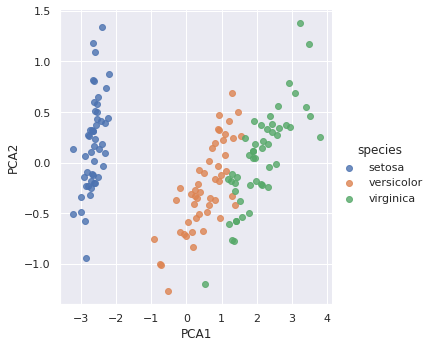

In [183]:
df['PCA1'] = trans_X[:, 0]
df['PCA2'] = trans_X[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=df, fit_reg=False);

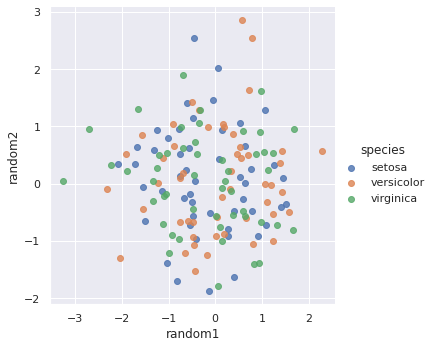

In [185]:
df['random1'] = np.random.normal(0,1,150)
df['random2'] = np.random.normal(0,1,150)
sns.lmplot("random1", "random2", hue='species', data=df, fit_reg=False);

In [199]:
## 회귀분석
## (예측값-실제값)**2 합의 평균
## 13개 변수 사용
## 5개 변수만 PCA

In [210]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [211]:
from sklearn.datasets import load_boston

In [213]:
X = load_boston().data
y = load_boston().target

In [221]:
org_X = X
pca_5 = PCA(5)
pca_5.fit(X)
trans_X = pca_5.transform(X)

In [222]:
lm = LinearRegression()
lm_trans = LinearRegression()

In [223]:
lm.fit(org_X,y)
lm_trans.fit(trans_X,y)

LinearRegression()

In [224]:
lm_predict = lm.predict(org_X)
lm_trans_predict = lm_trans.predict(trans_X)

In [225]:
lm_score = mean_squared_error(lm_predict, y)
lm_trans_score = mean_squared_error(lm_trans_predict, y)

In [226]:
print(lm_score)
print(lm_trans_score)

21.894831181729206
56.80269464125503


In [244]:
import seaborn as sns
df = sns.load_dataset('iris')
X = df.iloc[:,:-1]
from sklearn.cluster import KMeans      # 1. Choose the model class
model = KMeans(3)  # 2. Instantiate the model with hyperparameters
model.fit(X)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X)        # 4. Determine cluster labels

In [245]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
trans_X = pca_2.fit_transform(df.iloc[:,:-1])

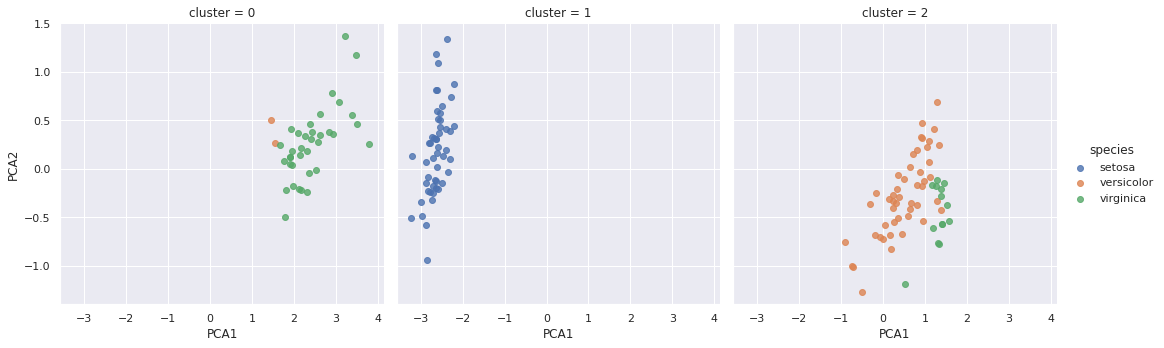

In [246]:
df['cluster'] = y_gmm
df['PCA1'] = trans_X[:, 0]
df['PCA2'] = trans_X[:, 1]
sns.lmplot("PCA1", "PCA2", data=df, hue='species',
           col='cluster', fit_reg=False);

In [228]:
from sklearn.cluster import KMeans